### Machine Learning For Diabetes ###


- uci machine learning diabetes dataset used for predicition

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
diabetes=pd.read_csv("diabetes.csv")
print(diabetes.shape)

(768, 9)


In [3]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Diabetes prediciton is classification task ###

- check databalance which is quite good

In [4]:
diabetes.Outcome.value_counts()


0    500
1    268
Name: Outcome, dtype: int64

- ohhh! 34% adults suffer from diabetes

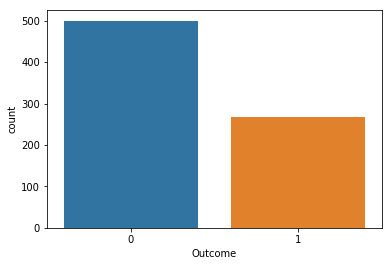

In [5]:
import seaborn as sns
sns.countplot(diabetes['Outcome'],label="Count")

In [6]:
diabetes.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
diabetes.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [8]:
diabetes.columns.tolist()

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

- check outlier and gaussian shape

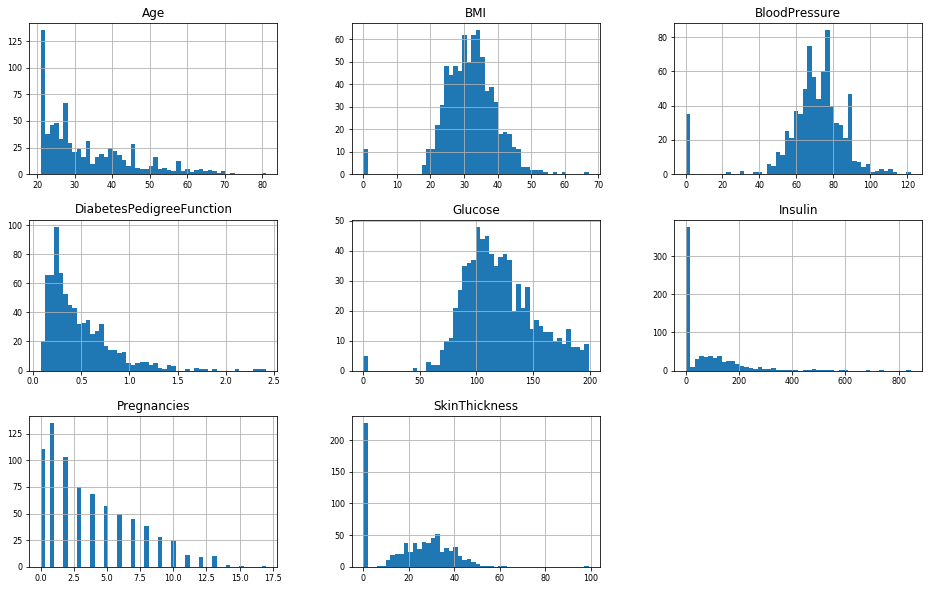

In [9]:
diabetes[['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']].hist(figsize=(16, 10), bins=50, xlabelsize=8, ylabelsize=8);

### outlier cleaning ###

- Pregnancies more than 10 is ideally not good so we consider it as outlier
- Body mass index is weight to height ration so weight less than 12 is not range of adults so we consider it as outlier
- bloodpressure lower than 40 is criticly low pressure so we consider it as outlier
- Glucose lower than 40 is criticly low pressure so we consider it as outlier
- SkinThickness lower than 60 is criticly low pressure so we consider it as outlier

removed all outlier

In [10]:
diabetes=diabetes[diabetes['Pregnancies']<=11]

In [11]:
diabetes=diabetes[diabetes['BMI']>=12]

In [12]:
diabetes=diabetes[diabetes['BloodPressure']>40]

In [13]:
diabetes=diabetes[diabetes['Glucose']>40]

In [14]:
diabetes=diabetes[diabetes['SkinThickness']<60]

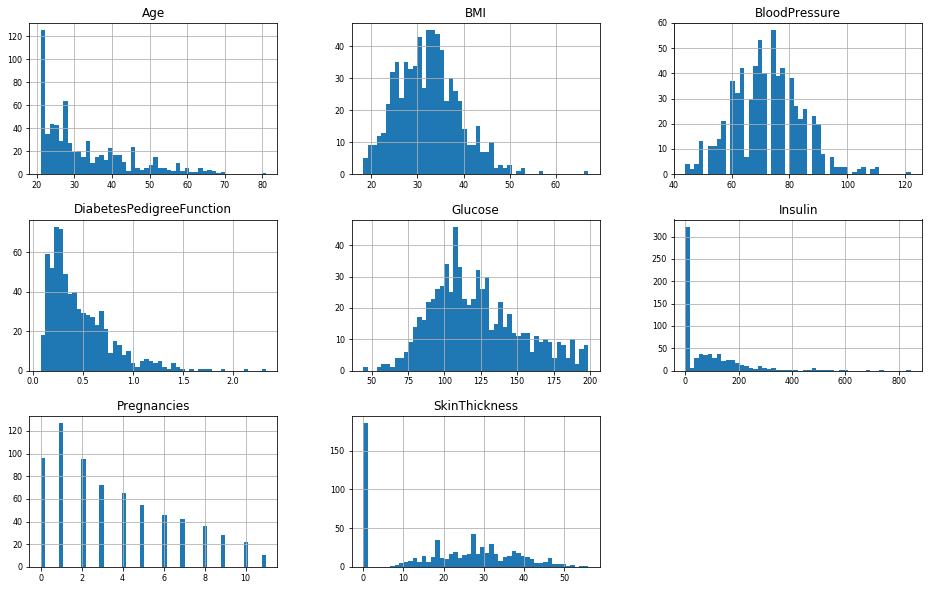

In [15]:
diabetes[['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']].hist(figsize=(16, 10), bins=50, xlabelsize=8, ylabelsize=8);

### Correlation ###

- after removal of outlier you can check distribution is likely normal
- we are going to use correlation for finding independent variable correlation

Assumption For PCC
- data should be normalize so we make it by normalizer
- linear you can check some features to be linear
- normal distributed
- applied always on continues variables


Text(0.5,1,'Correlation between different fearures')

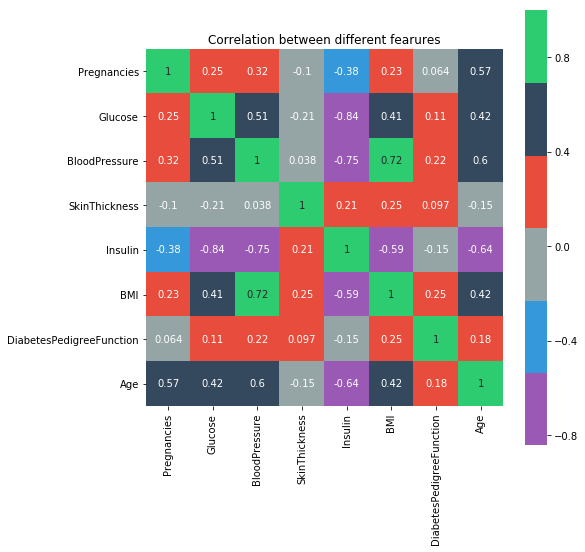

In [16]:
from sklearn.preprocessing import Normalizer
normalized_application = Normalizer().fit_transform(diabetes[['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']])
#print (normalized_application)

normal_df=pd.DataFrame(normalized_application)
normal_df.columns=['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

cor=normal_df.corr()
plt.figure(figsize=(8,8))
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
sns.heatmap(cor, vmax=1, square=True,annot=True,cmap=flatui)
plt.title('Correlation between different fearures')

### PCC Interpretation ###

- Pregnancies and age correlated which is right
- Glucose and BMI,age correlated which is right
- Blood pressure related to Glucose,BMI and Age which gives instinct about diabetes

as per the interpreation we are going to retain all independet variables for model

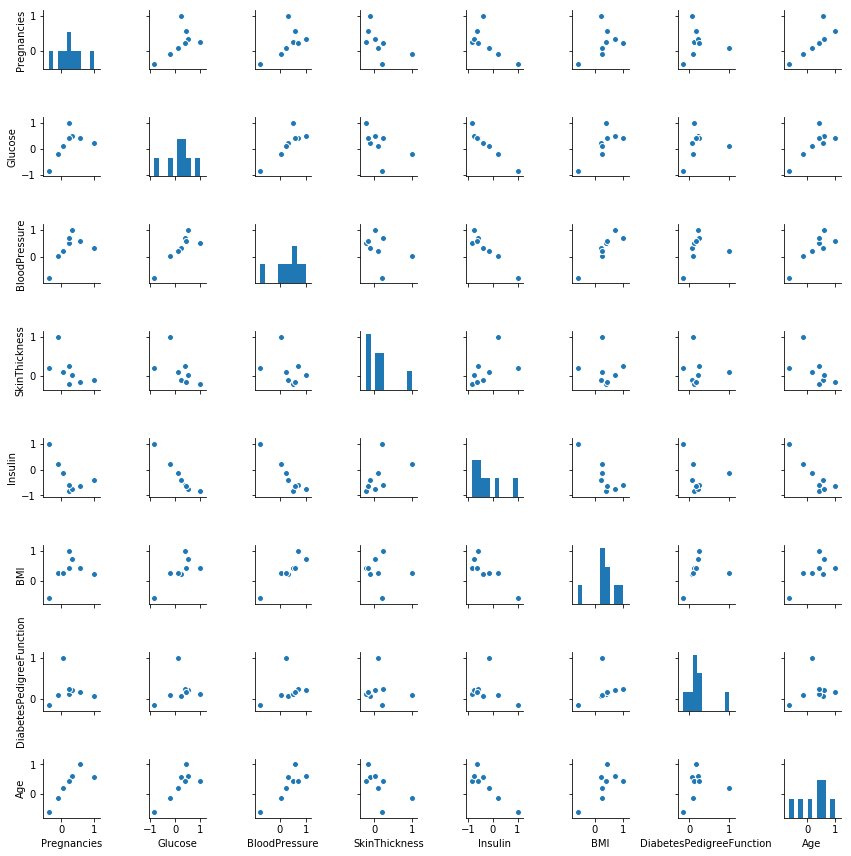

In [17]:
colnames=['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']
sns.pairplot(cor[colnames],size=1.5,x_vars=colnames,y_vars=colnames)

plt.show()

### Check linearity in above graph which is good sign of correlation ###

In [18]:
diabetes.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [19]:
normal_df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

In [20]:
print(diabetes.shape)
print(normal_df.shape)

(694, 9)
(694, 8)


In [21]:
diatbetes=diabetes.reset_index(drop=True)

In [22]:
normal_df=normal_df.reset_index(drop=True)

In [23]:
normal_df['Outcome'] = diabetes.Outcome.values

In [24]:
from sklearn.model_selection import train_test_split
df_train, df_val = train_test_split(normal_df, test_size=0.30)



In [25]:
print(df_train.shape)
print(df_val.shape)


(485, 9)
(209, 9)


### Logistic classification model with 0.62 Accuracy ###

- with good algorithm we can achieve more accuracy

In [26]:
from sklearn.linear_model import LogisticRegression
features = normal_df.drop(["Outcome"], axis=1).columns

logreg = LogisticRegression().fit(df_train[features], df_train['Outcome'])



print("Training set score: {:.3f}".format(logreg.score(df_train[features], df_train['Outcome'])))
print("Validation set score: {:.3f}".format(logreg.score(df_val[features], df_val['Outcome'])))

Training set score: 0.682
Validation set score: 0.622


In [27]:
testdiabetes=pd.read_csv("testdiabetes.csv")
print(testdiabetes.shape)

(1, 8)


### Test Data Prediction ###

In [28]:
normalized = Normalizer().fit_transform(testdiabetes)
#print (normalized_application)

normal_test=pd.DataFrame(normalized)
normal_test.columns=['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']


prediction=logreg.predict(normal_test)

In [29]:
print(prediction)

[0]
